In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv("Salary_dataset.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [4]:
data.drop("Unnamed: 0", axis = 1, inplace = True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


<Axes: ylabel='YearsExperience'>

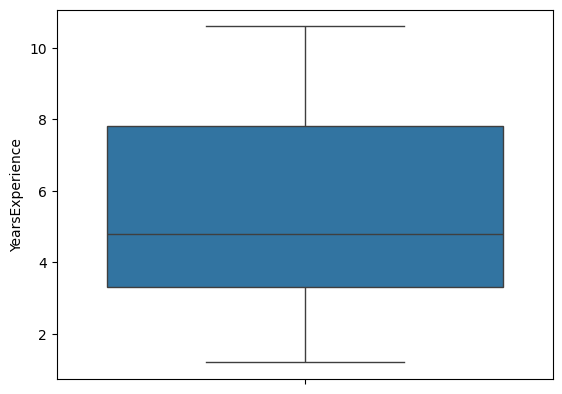

In [6]:
sns.boxplot(data["YearsExperience"])

<Axes: ylabel='Salary'>

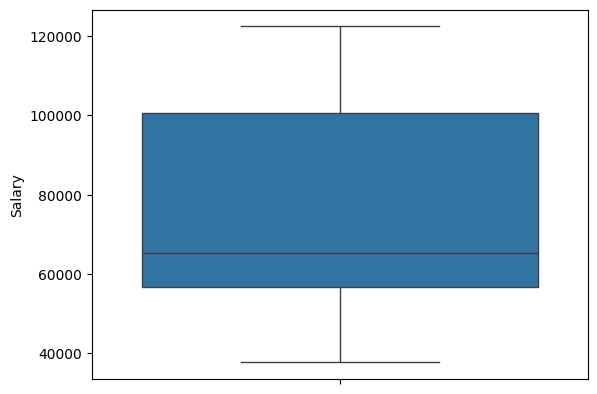

In [7]:
sns.boxplot(data["Salary"])

<Axes: xlabel='Salary', ylabel='Count'>

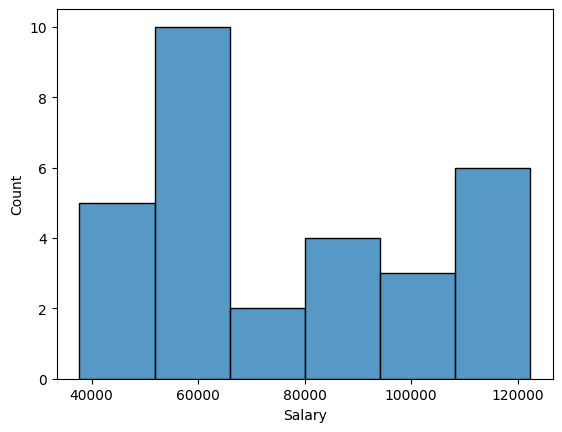

In [8]:
sns.histplot(data["Salary"])

<Axes: xlabel='YearsExperience', ylabel='Count'>

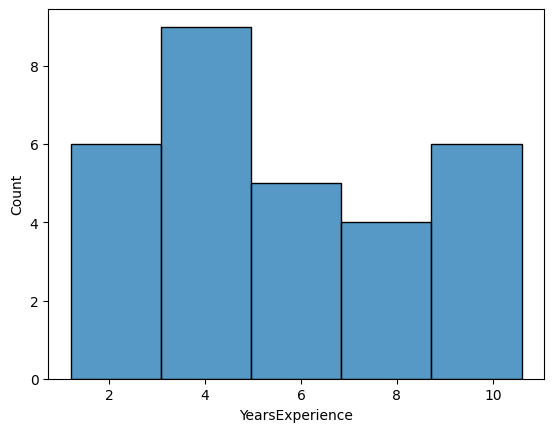

In [9]:
sns.histplot(data["YearsExperience"],bins=5)

<Axes: ylabel='YearsExperience'>

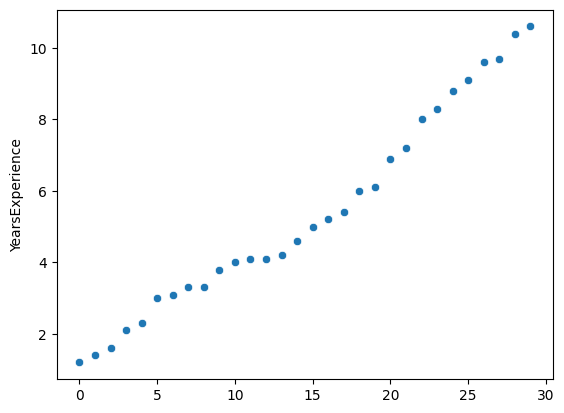

In [10]:
sns.scatterplot(data["YearsExperience"])

<Axes: ylabel='Salary'>

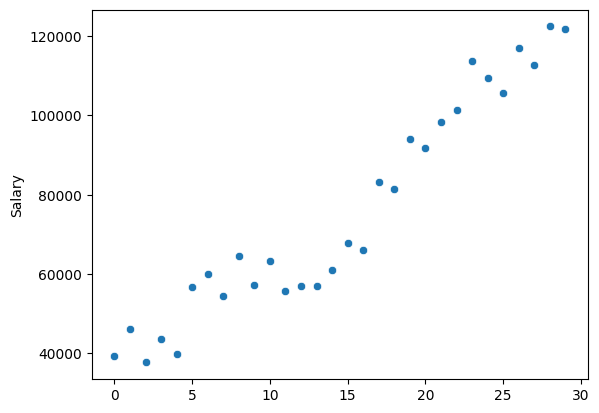

In [11]:
sns.scatterplot(data["Salary"])

<Axes: xlabel='YearsExperience', ylabel='Salary'>

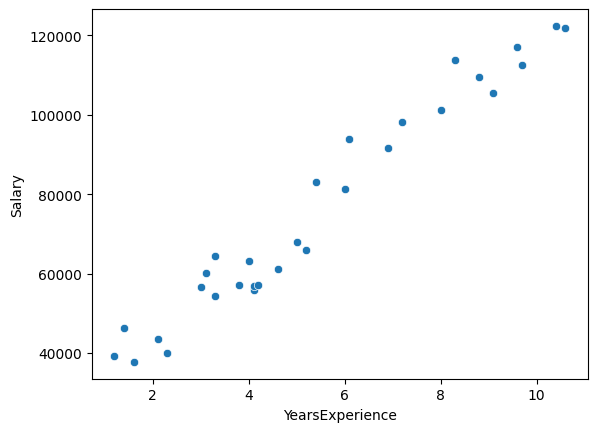

In [12]:
sns.scatterplot(x=data["YearsExperience"], y=data["Salary"])

# Observations:

1. No outliers in both the columns
2. Majority of them are paid around 60,000
3. Most of them have 3-5 years of experience
4. The frequencies are not uniform, with some bins (e.g., around 8 years) having fewer counts compared to others
5. Positive Corelation - Salary is increasing as the number of years in experience increases.
6. **Holds Linear Relationship** between dependent and independent variables - Satisfied the assumption of linear regression

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data["YearsExperience"],data["Salary"],test_size=0.2,random_state=42 )

In [14]:
X_test

27    9.7
15    5.0
23    8.3
17    5.4
8     3.3
9     3.8
Name: YearsExperience, dtype: float64

In [15]:
y_test

27    112636.0
15     67939.0
23    113813.0
17     83089.0
8      64446.0
9      57190.0
Name: Salary, dtype: float64

In [16]:
X_train

28    10.4
24     8.8
12     4.1
0      1.2
4      2.3
16     5.2
5      3.0
13     4.2
11     4.1
22     8.0
1      1.4
2      1.6
25     9.1
3      2.1
21     7.2
26     9.6
18     6.0
29    10.6
20     6.9
7      3.3
10     4.0
14     4.6
19     6.1
6      3.1
Name: YearsExperience, dtype: float64

In [17]:
X_train.shape[0]

24

In [18]:
# OLS Approach Linear Regression Formula 

# Formula for slope (m):
# m = Σ((X_i - mean(X)) * (y_i - mean(y))) / Σ((X_i - mean(X))^2)

# Formula for intercept (b):
# b = mean(y) - m * mean(X)

def simple_linear_regression(X_train_set, y_train_set):
    X_mean = np.mean(X_train_set)
    y_mean = np.mean(y_train_set)
    # y = mx + b
    for i in range(X_train_set.shape[0]): 
        numerator = 0
        denominator = 0
        numerator += ((y_train_set.iloc[i] - y_mean) * (X_train_set.iloc[i] - X_mean))
        denominator += ((X_train_set.iloc[i] - X_mean) ** 2 )
        # SLOPE - m value
        slope = numerator / denominator
        # OFFSET - b value
        offset = (y_mean - (slope * X_mean))
    
    return slope, offset

In [19]:
slope, offset = simple_linear_regression(X_train, y_train)

In [20]:
slope, offset

(6426.342857142857, 40229.33714285714)

In [21]:
def predict(years_of_experience):
    salary = (slope * years_of_experience) + offset
    return salary


In [22]:
predict(9.7)

102564.86285714284

In [23]:
for data_point in range(X_test.shape[0]):
    prediction = predict(X_test.iloc[data_point])
    print(prediction)

102564.86285714284
72361.05142857143
93567.98285714284
74931.58857142855
61436.26857142857
64649.439999999995


In [24]:
y_test

27    112636.0
15     67939.0
23    113813.0
17     83089.0
8      64446.0
9      57190.0
Name: Salary, dtype: float64